#Load Libraries

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import combinations

#Features

In [4]:
train_data = pd.read_csv('train.csv')

#Map tree codes to names
tree_map = {1:'Spruce/Fir',
            2:'Lodgepole Pine',
            3:'Ponderosa Pine',
            4:'Cottonwood/Willow',
            5:'Aspen',
            6:'Douglas-fir',
            7:'Krummholz'}

train_data['Tree'] = train_data['Cover_Type'].apply(func = lambda x: tree_map[x])

for name in train_data.columns:
    print name

Id
Elevation
Aspect
Slope
Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Hillshade_9am
Hillshade_Noon
Hillshade_3pm
Horizontal_Distance_To_Fire_Points
Wilderness_Area1
Wilderness_Area2
Wilderness_Area3
Wilderness_Area4
Soil_Type1
Soil_Type2
Soil_Type3
Soil_Type4
Soil_Type5
Soil_Type6
Soil_Type7
Soil_Type8
Soil_Type9
Soil_Type10
Soil_Type11
Soil_Type12
Soil_Type13
Soil_Type14
Soil_Type15
Soil_Type16
Soil_Type17
Soil_Type18
Soil_Type19
Soil_Type20
Soil_Type21
Soil_Type22
Soil_Type23
Soil_Type24
Soil_Type25
Soil_Type26
Soil_Type27
Soil_Type28
Soil_Type29
Soil_Type30
Soil_Type31
Soil_Type32
Soil_Type33
Soil_Type34
Soil_Type35
Soil_Type36
Soil_Type37
Soil_Type38
Soil_Type39
Soil_Type40
Cover_Type
Tree


In [5]:
print train_data.describe()

                Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000         

#Look Across Cover Types

In [166]:
gb = train_data.groupby(['Tree'])
gb['Id'].count()

Tree
Aspen                2160
Cottonwood/Willow    2160
Douglas-fir          2160
Krummholz            2160
Lodgepole Pine       2160
Ponderosa Pine       2160
Spruce/Fir           2160
Name: Id, dtype: int64

Even number of each class

#Continuous Variables

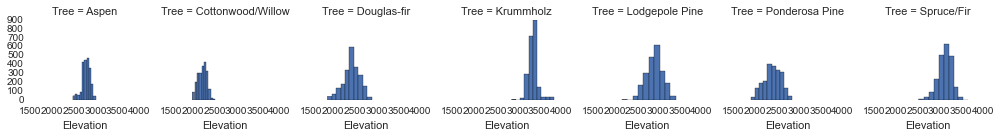

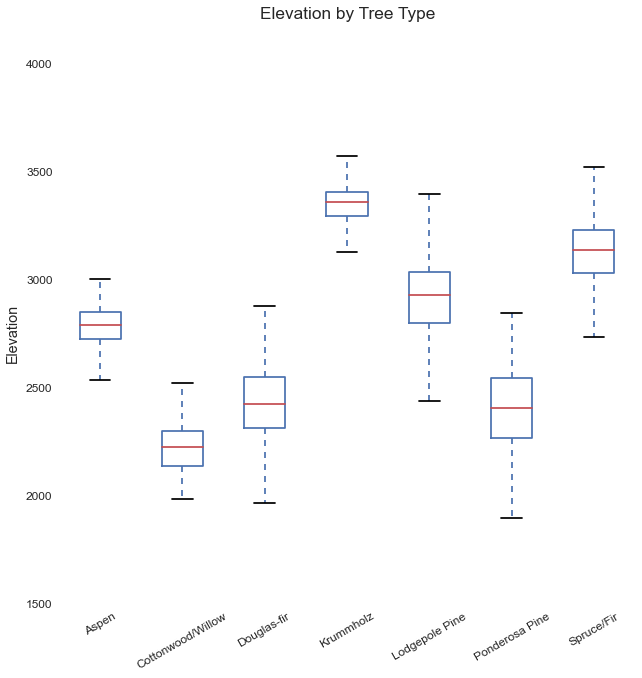

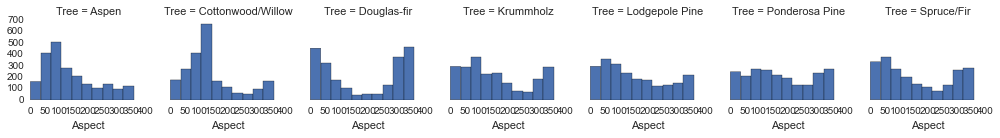

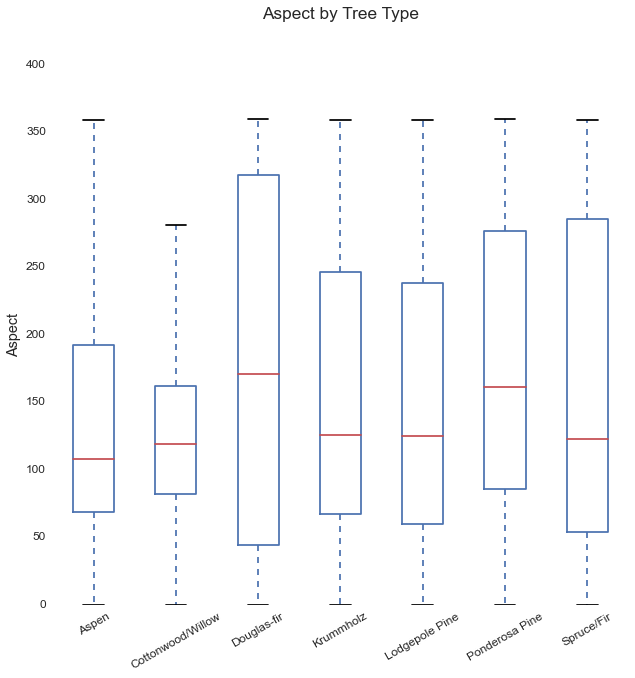

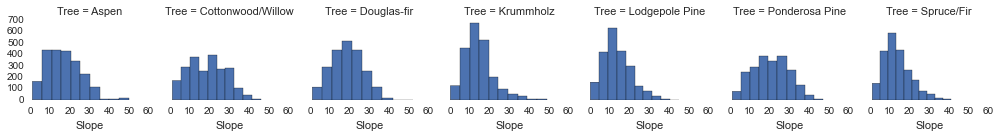

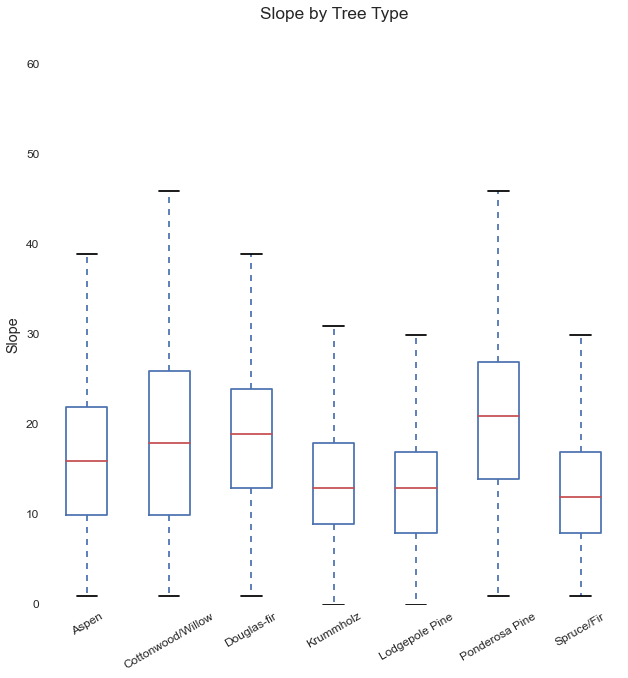

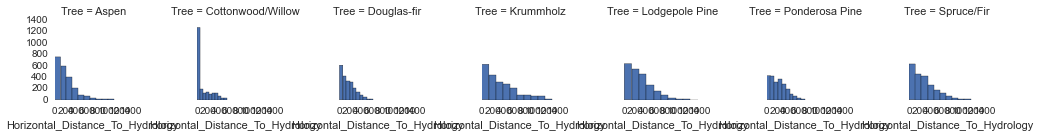

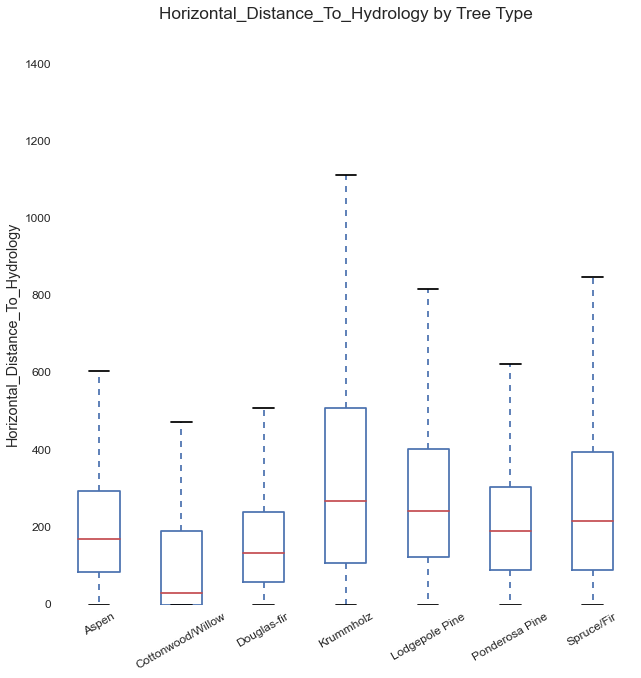

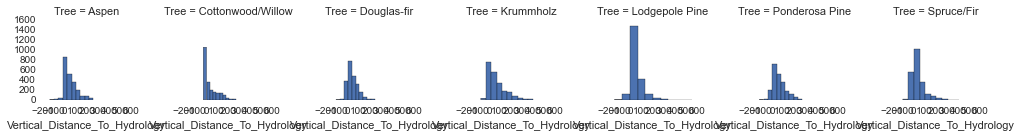

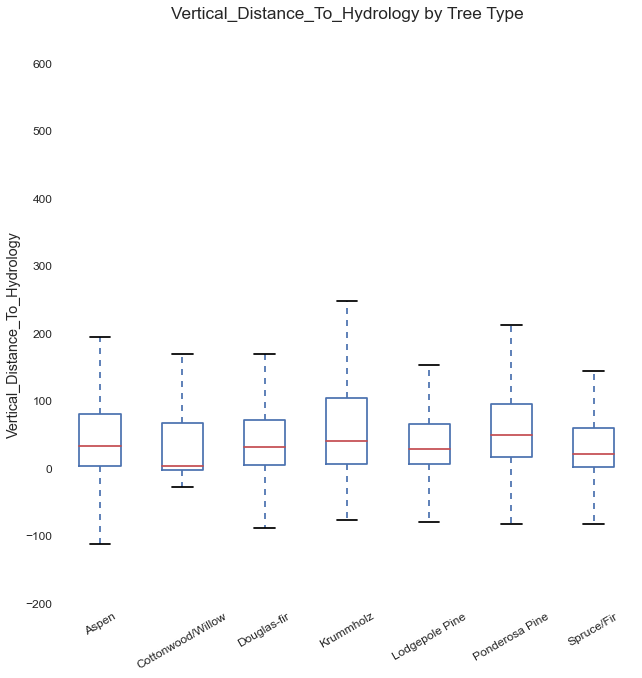

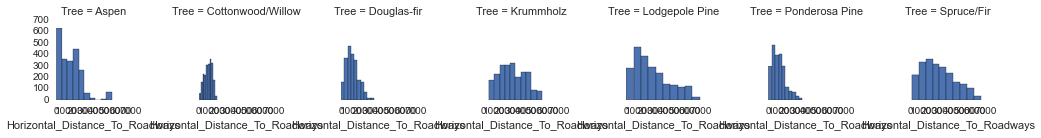

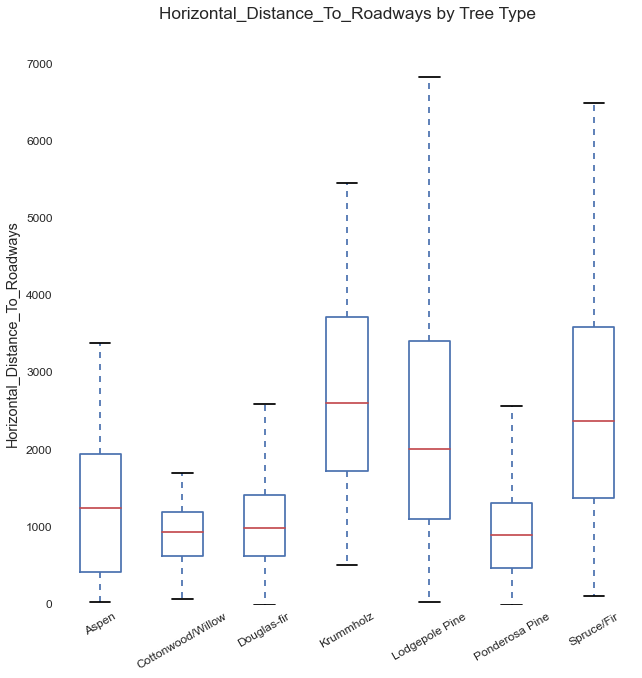

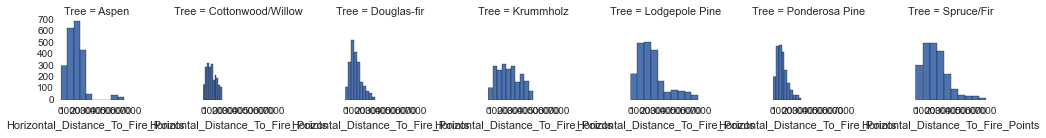

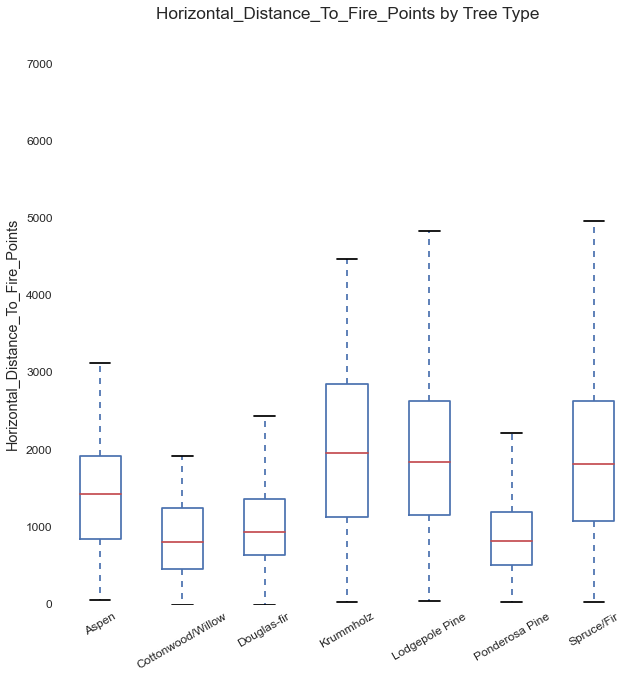

In [167]:
contin_col = ['Elevation',
                'Aspect', 
                'Slope',
                'Horizontal_Distance_To_Hydrology', 
                'Vertical_Distance_To_Hydrology', 
                'Horizontal_Distance_To_Roadways', 
                'Horizontal_Distance_To_Fire_Points']

def make_boxplot(var):
    train_data.boxplot(column = var, by = 'Tree', figsize=(10,10))
    plt.xticks(rotation=30,size = 'large')
    plt.yticks(size = 'large')
    plt.ylabel(var, size = 'x-large')
    plt.title('')
    plt.xlabel('')
    plt.suptitle(var + ' by Tree Type', size = 'xx-large')
    plt.show();

def make_dist(var):
    items = sns.FacetGrid(train_data, col = 'Tree', size= 2)
    items.map(plt.hist, var)
    plt.show();

for col in contin_col:
    make_dist(col)
    make_boxplot(col)


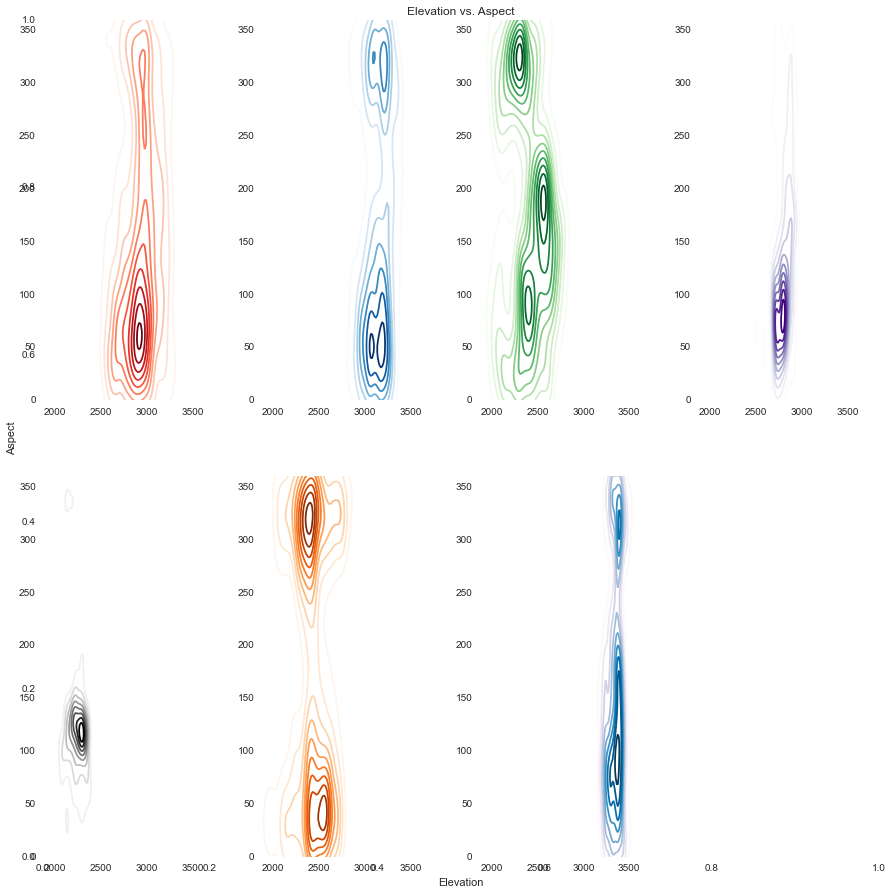

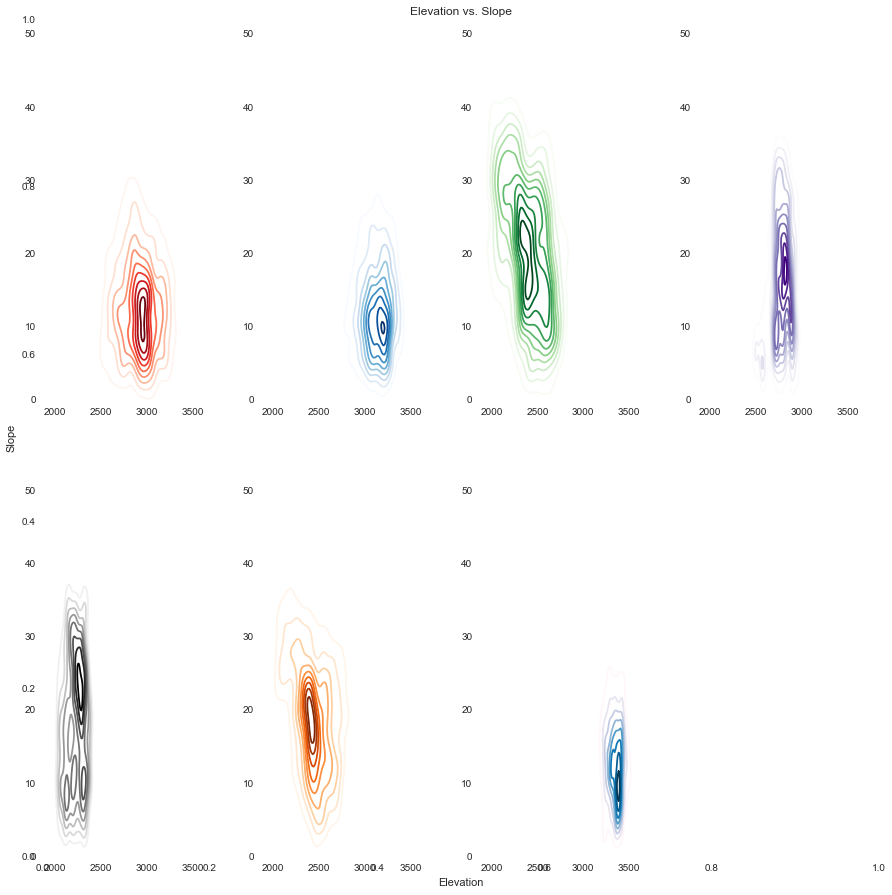

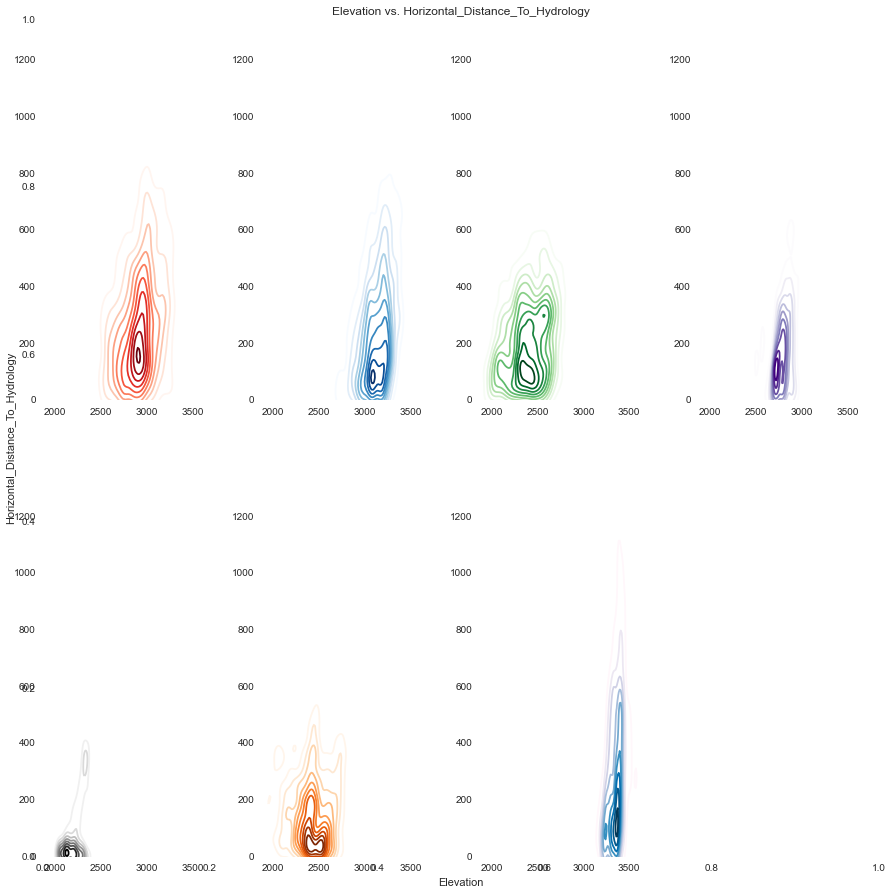

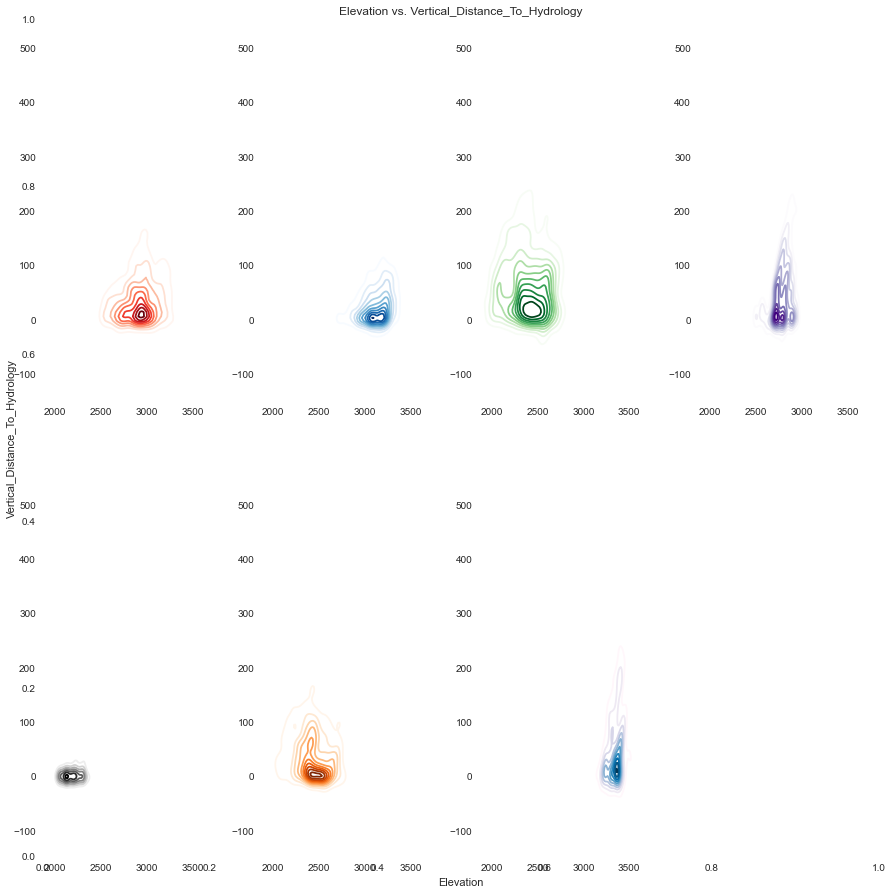

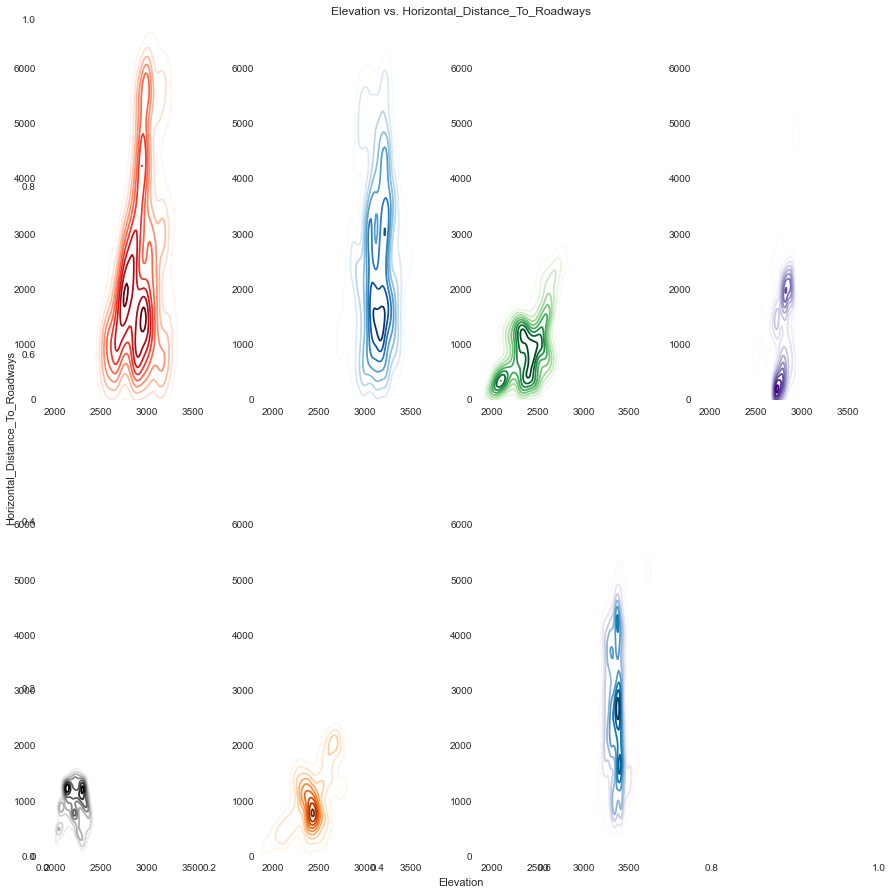

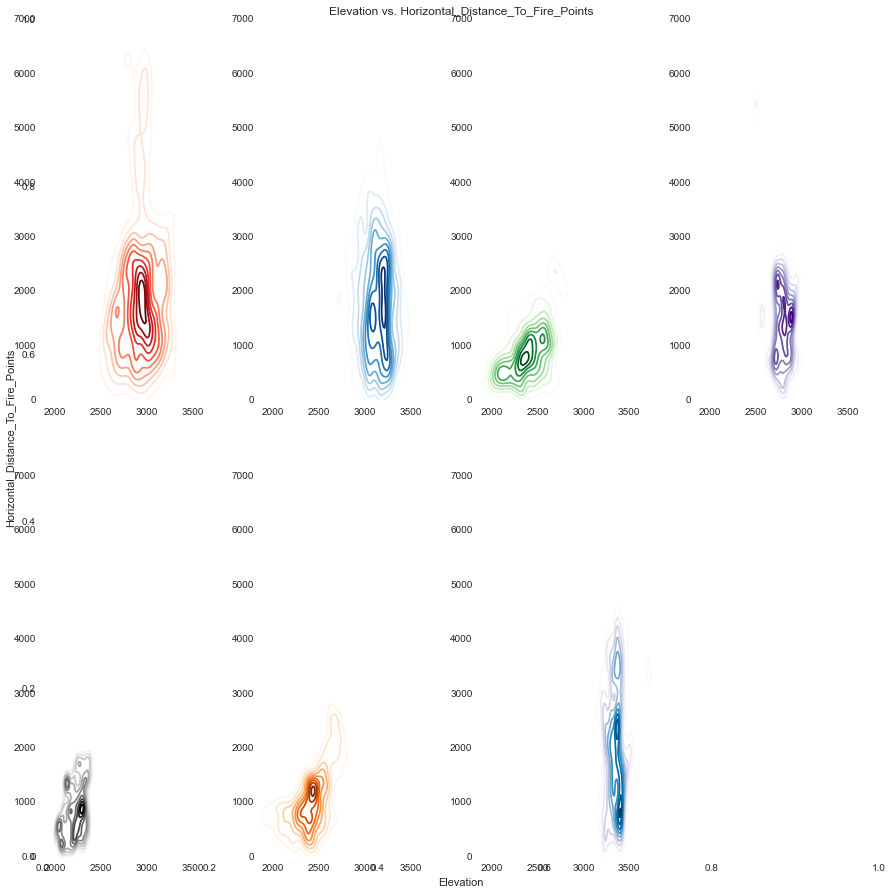

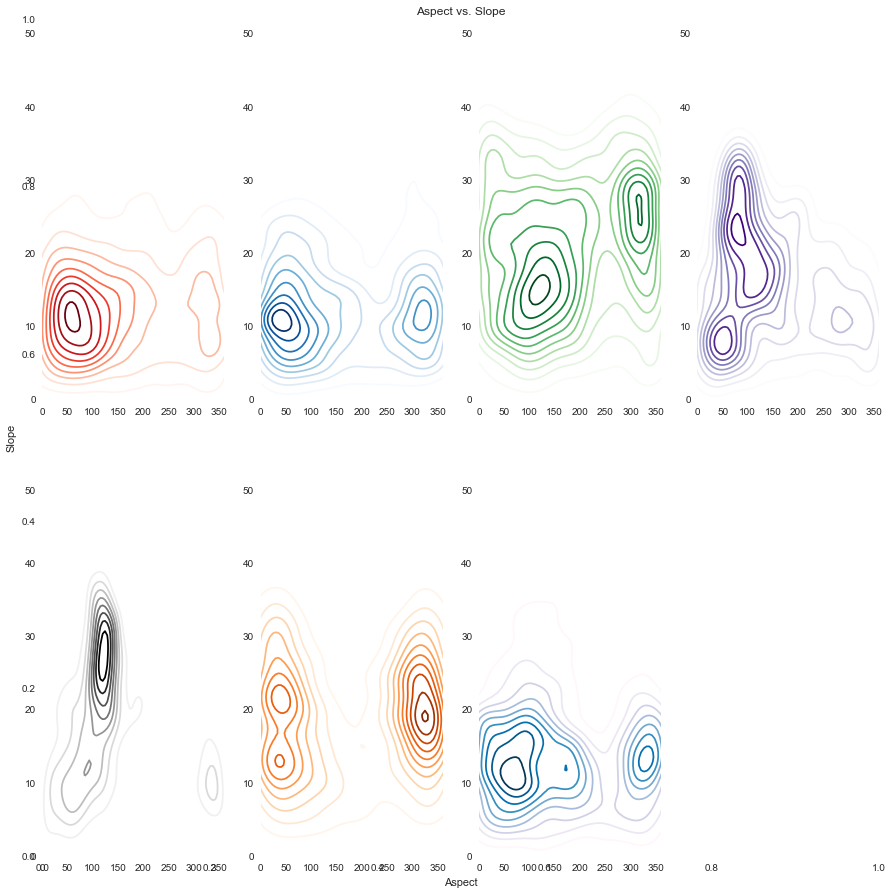

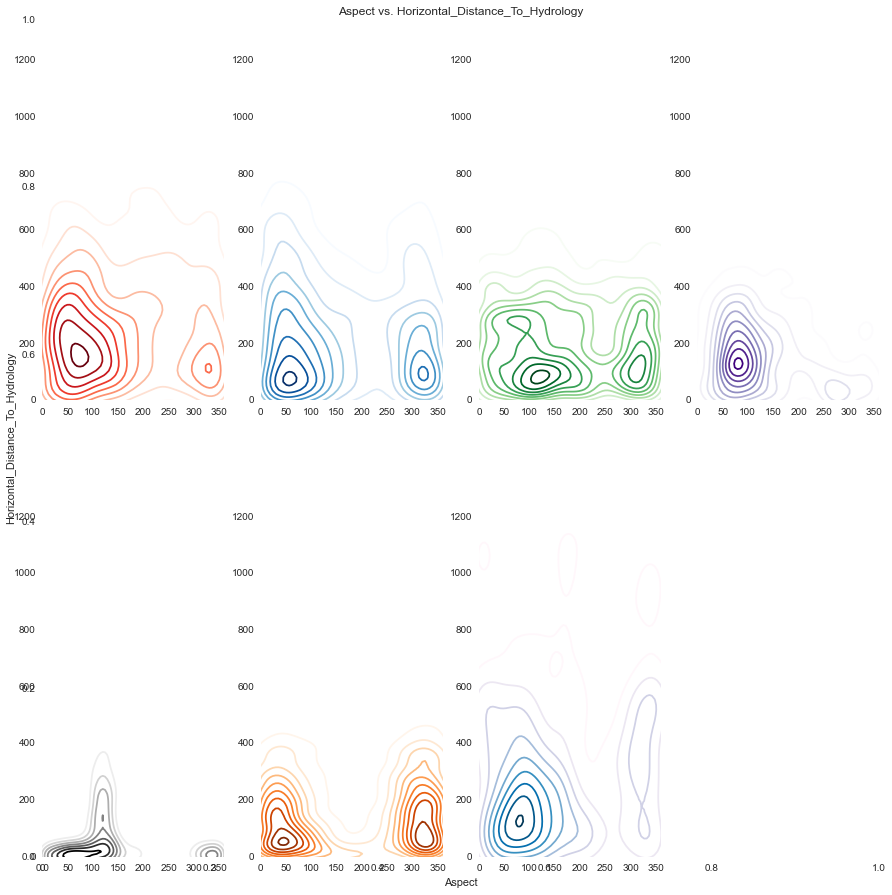

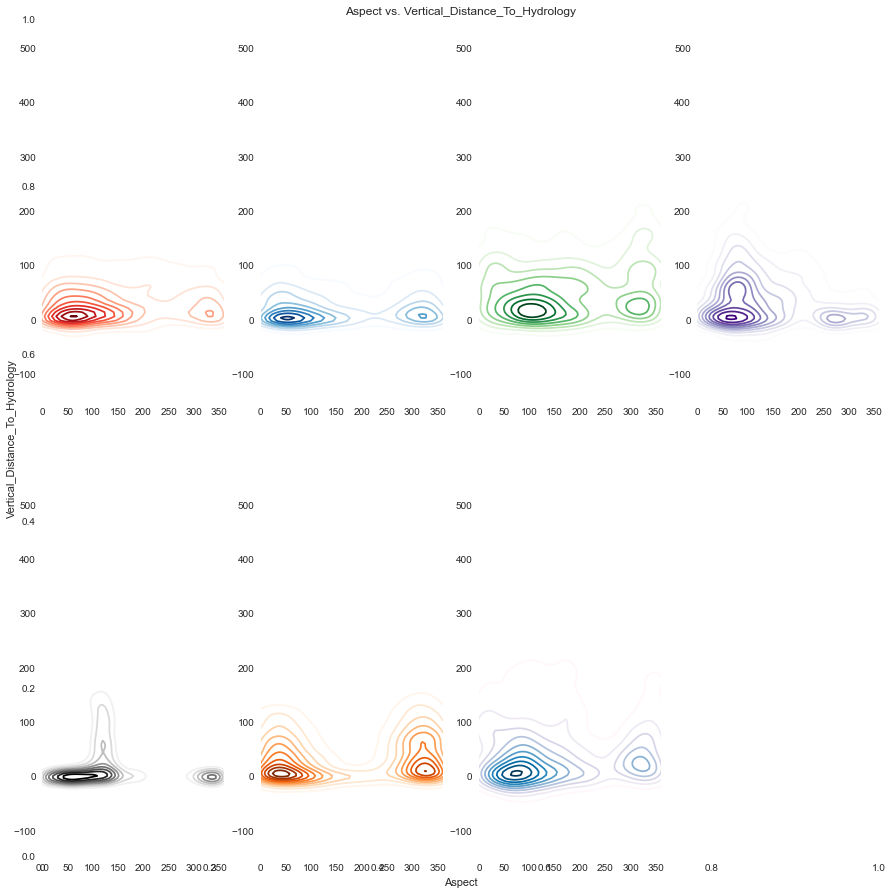

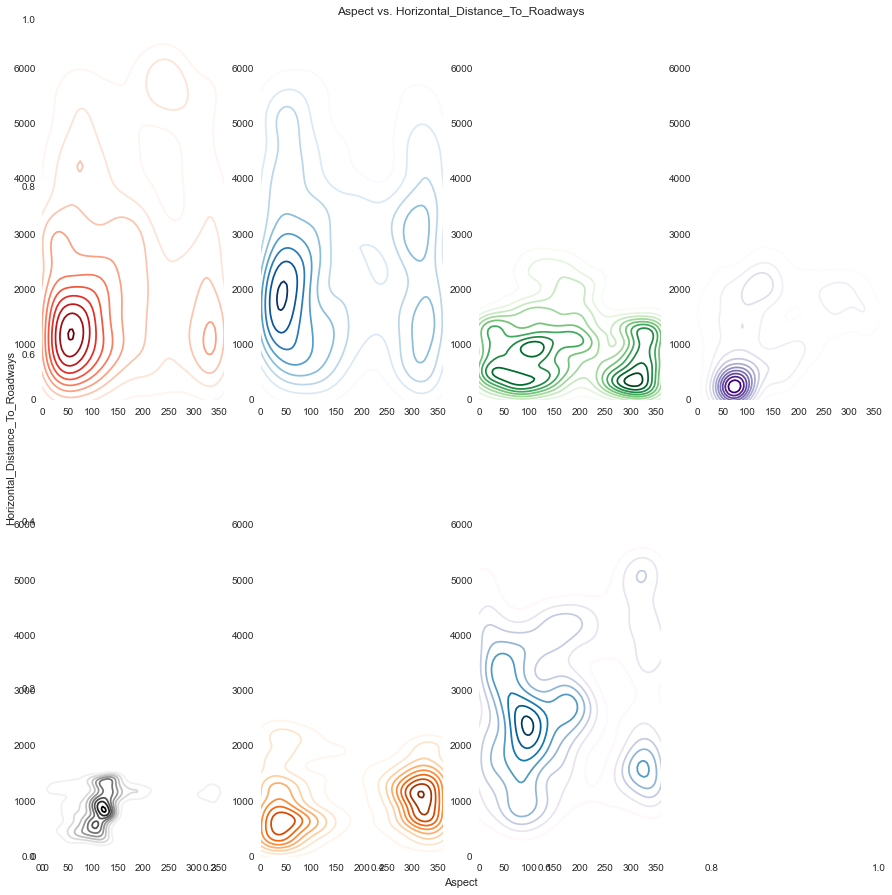

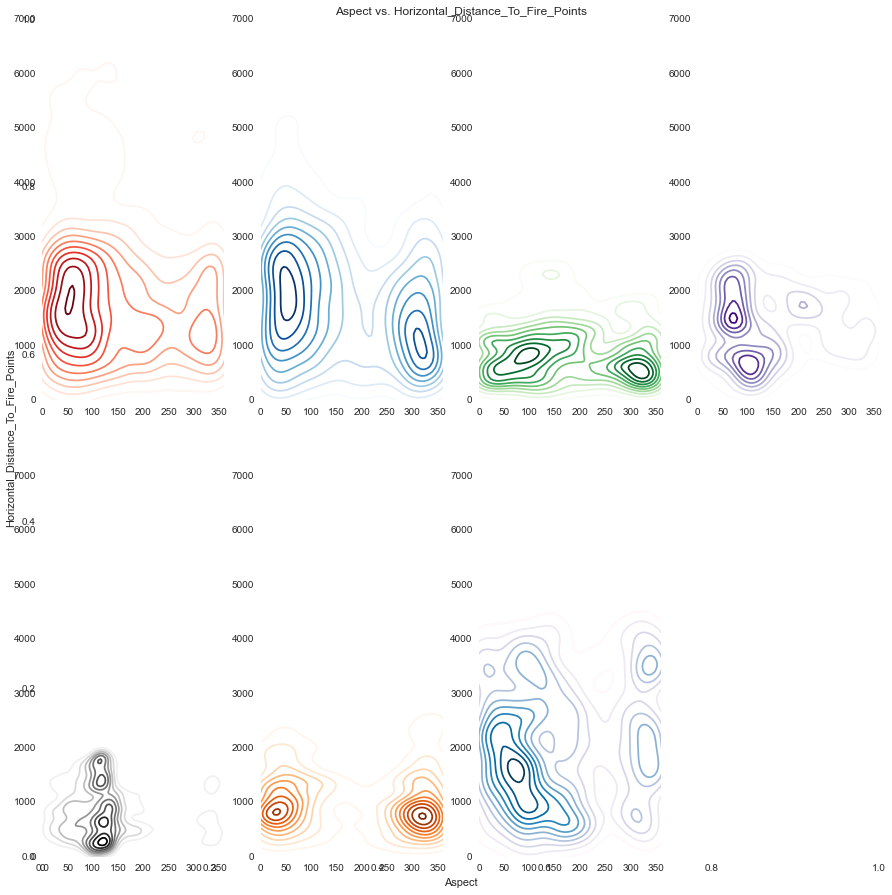

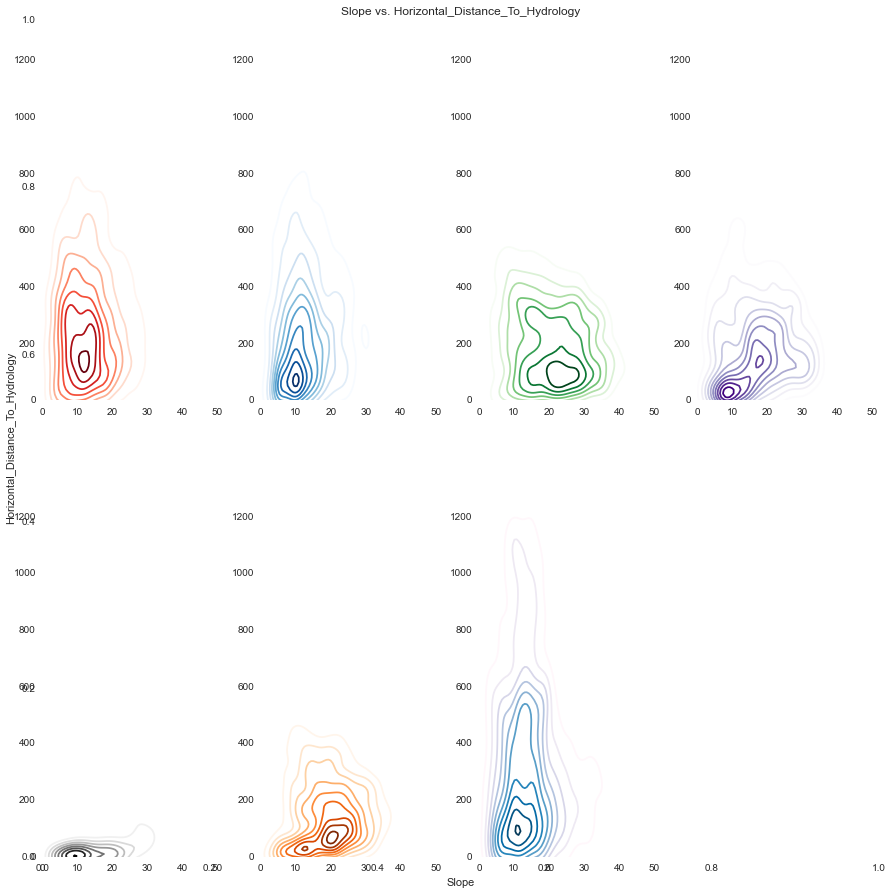

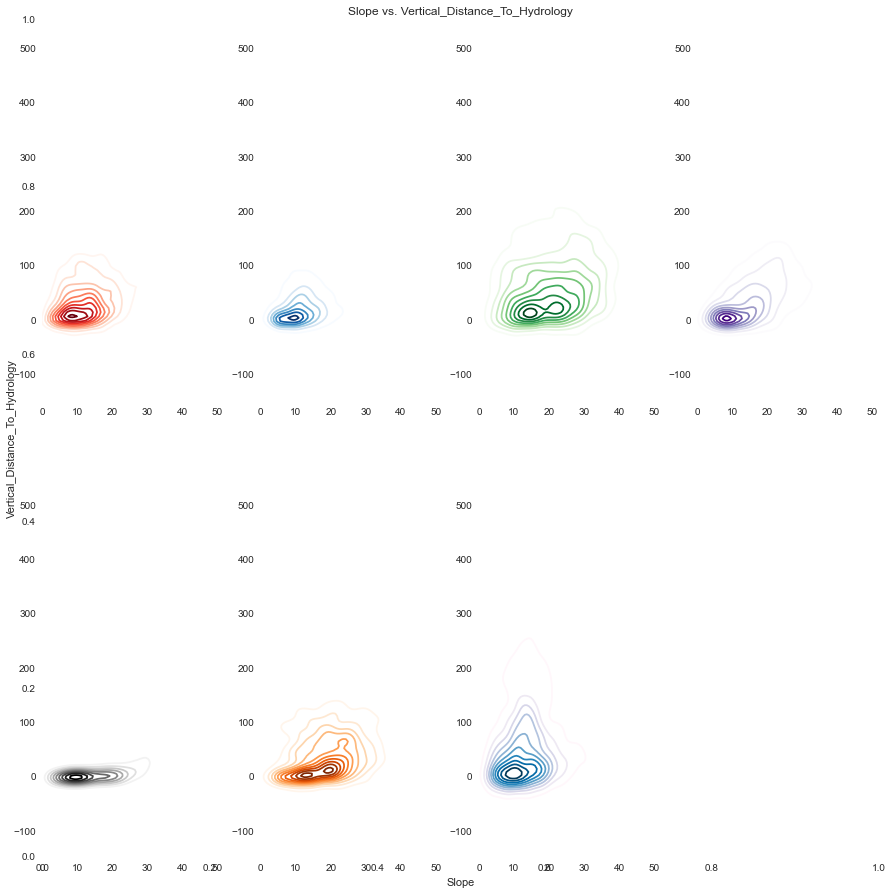

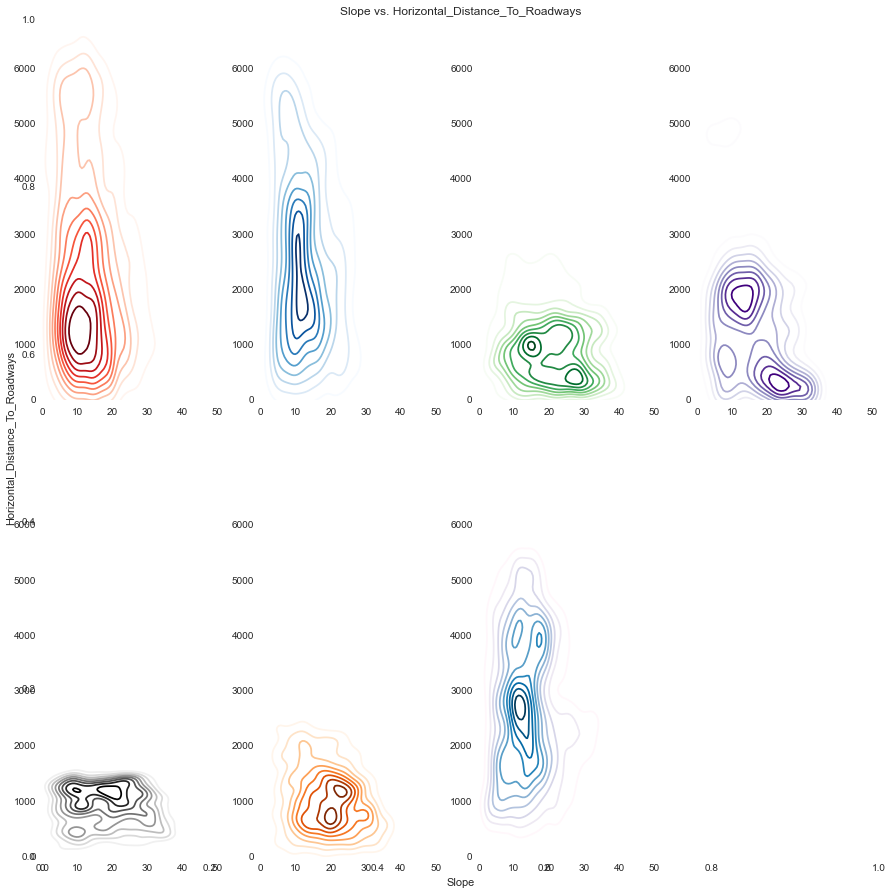

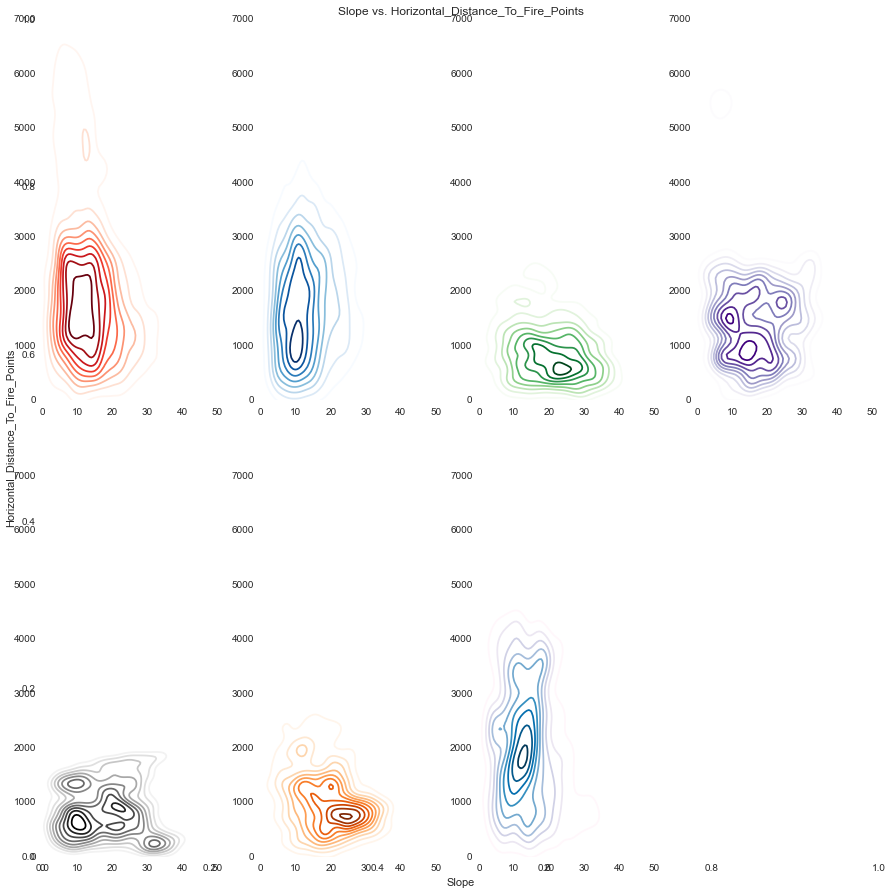

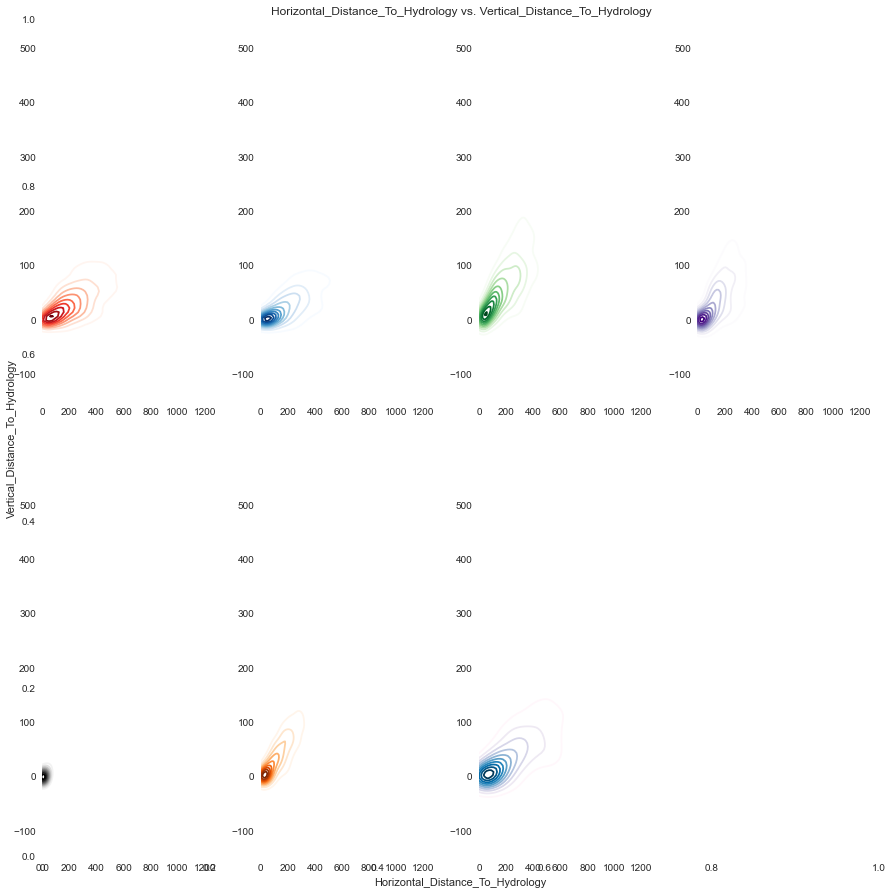

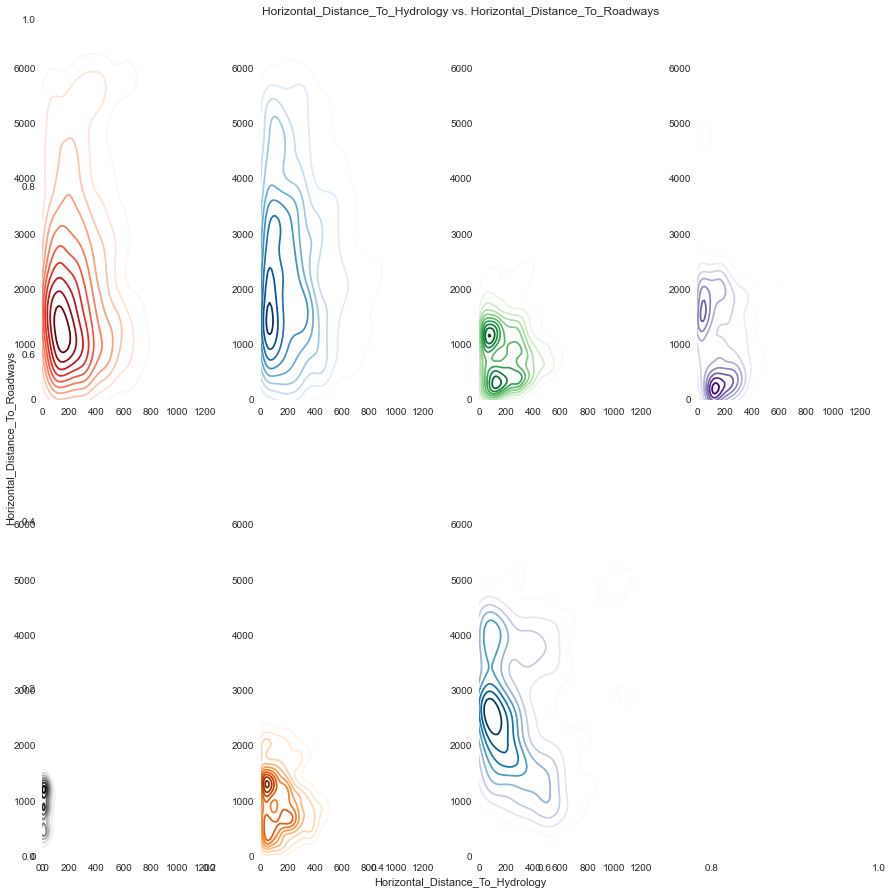

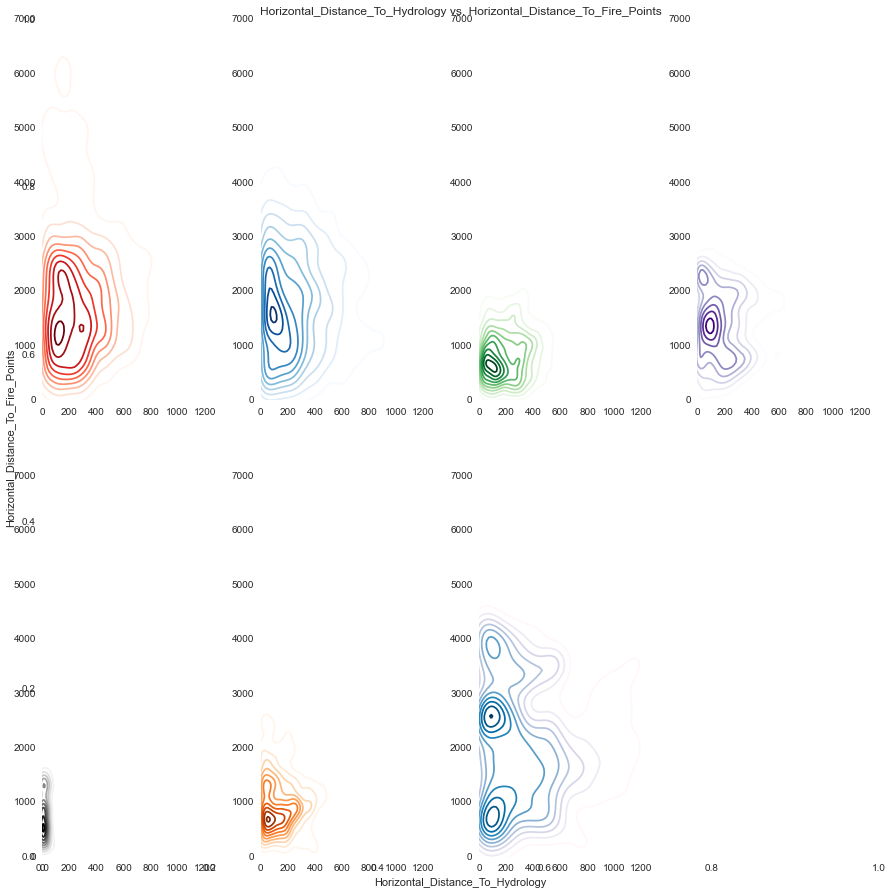

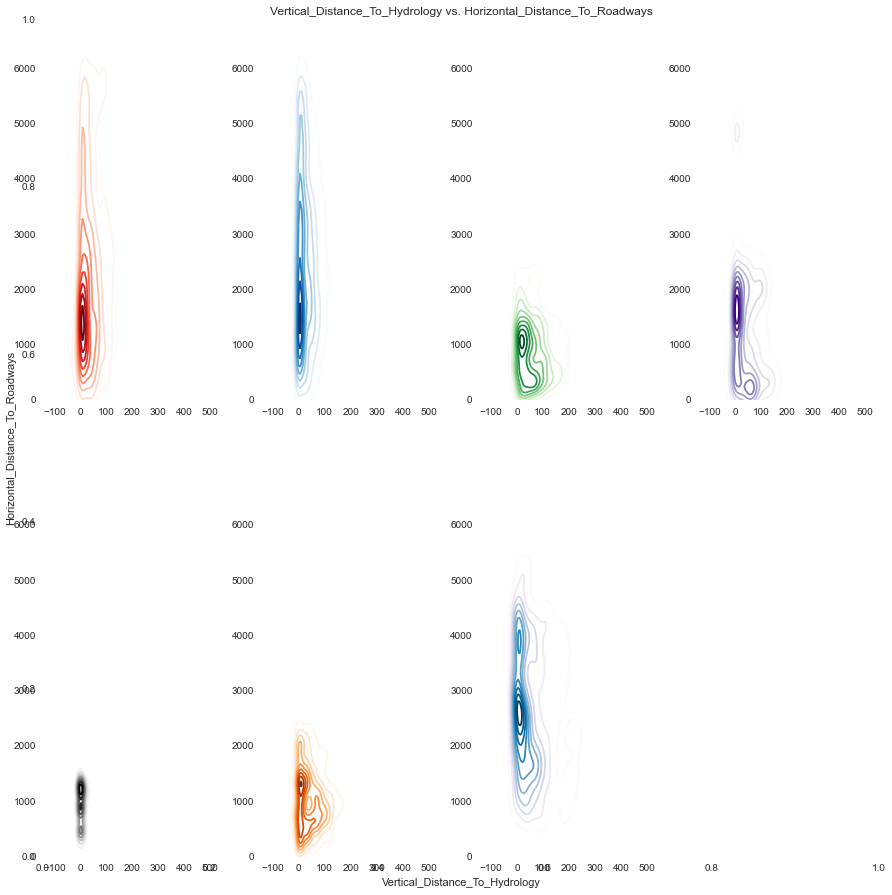

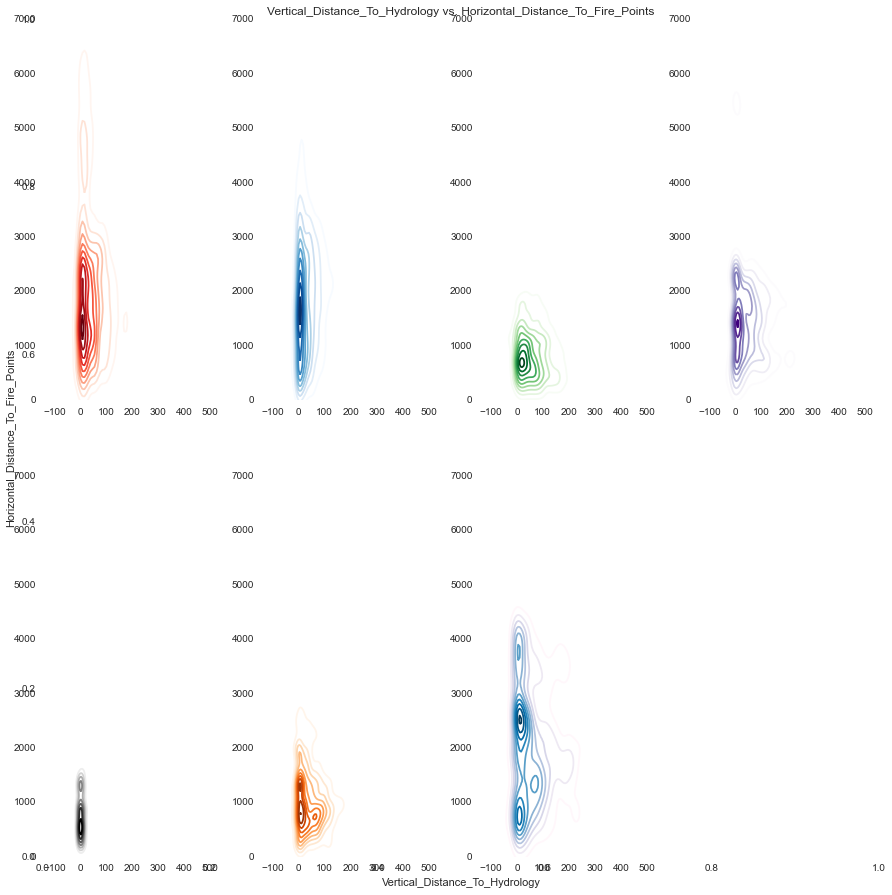

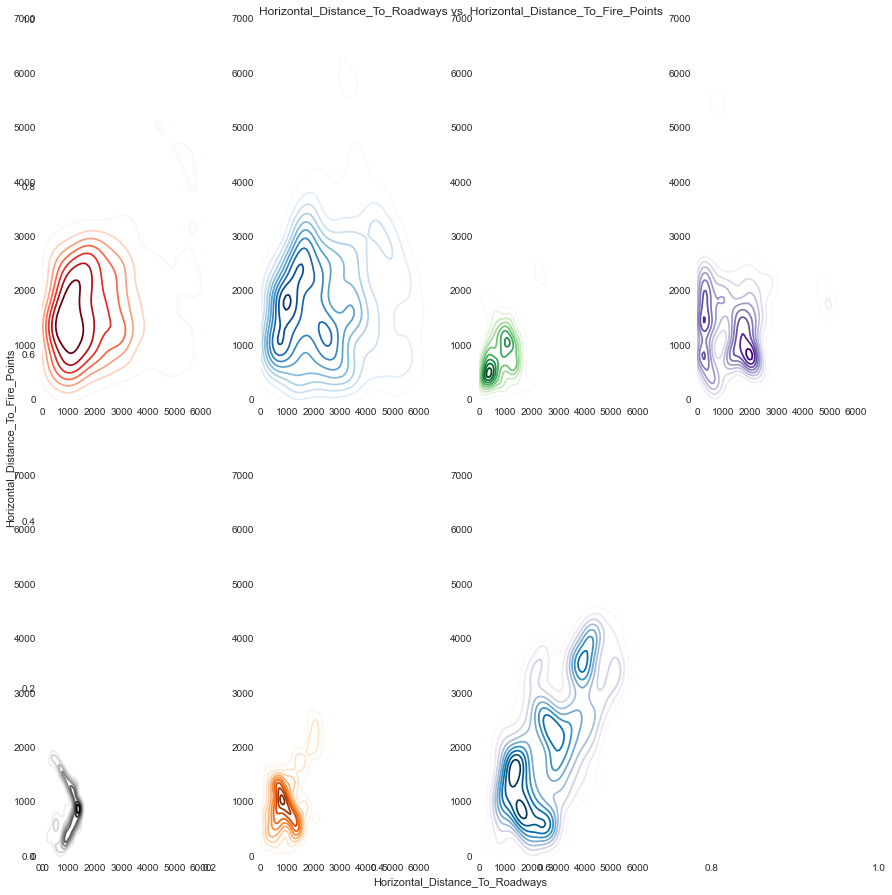

In [168]:
tree_names = ['Lodgepole Pine', 'Spruce/Fir', 'Ponderosa Pine', 'Aspen', 'Cottonwood/Willow','Douglas-fir','Krummholz']

def bivariate_dist(var1, var2):
    f = plt.figure(figsize=(15, 15))
    plt.title(var1 + " vs. " + var2)
    plt.xlabel(var1)
    plt.ylabel(var2)
    colors = ["Reds", "Blues", "Greens", "Purples", "Greys", "Oranges", "PuBu"]
    for indx, tree in enumerate(tree_names):
        df = train_data[train_data['Tree'] == tree]
        f.add_subplot(2,4,indx+1)
        sns.kdeplot(df[var1].values, df[var2].values,
                 cmap=colors[indx], shade=False, shade_lowest=False)
        pylab.xlim([train_data[var1].min(),train_data[var1].max()])
        pylab.ylim([train_data[var2].min(),train_data[var2].max()])
    plt.show();

contin_var_comb = combinations(contin_col, 2)

for pair in contin_var_comb:
    var1, var2 = pair
    bivariate_dist(var1, var2)

#Ordinal Variables

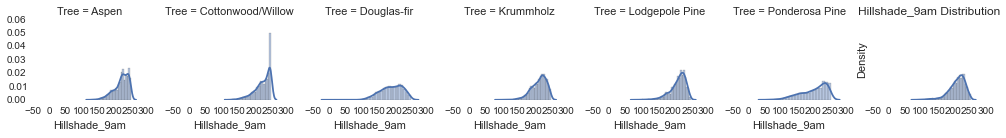

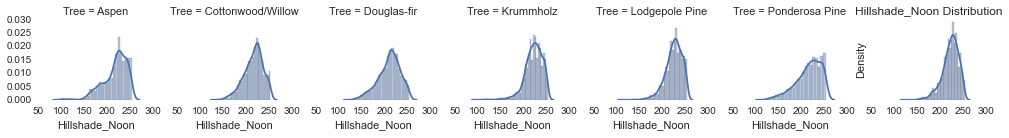

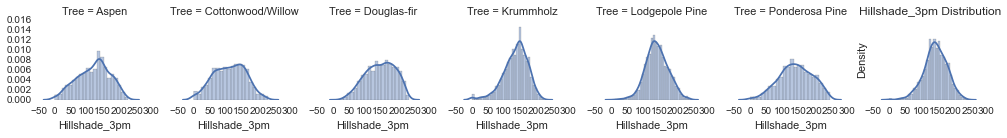

In [169]:
ordinal_columns = ['Hillshade_9am', 
                'Hillshade_Noon', 
                'Hillshade_3pm']

def ord_dist(var):
    items = sns.FacetGrid(train_data, col = 'Tree', size= 2)
    #dist_plot = (hist=False, rug=True, color ='r')
    items.map(sns.distplot, var)
    plt.title(var + " Distribution")
    plt.xlabel('')
    plt.ylabel('Density')
    plt.show();
    
for col in ordinal_columns:
    ord_dist(col)

#Binary Variables

In [170]:
nonbin = contin_col + ordinal_columns + ['Tree', 'Id', 'Cover_Type']
binary_columns = [x for x in train_data.columns if x not in nonbin]

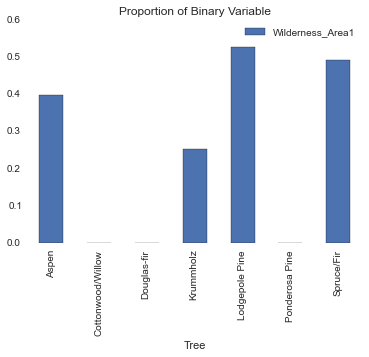

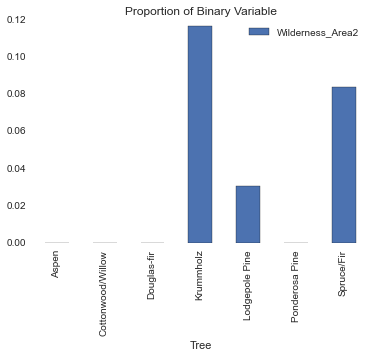

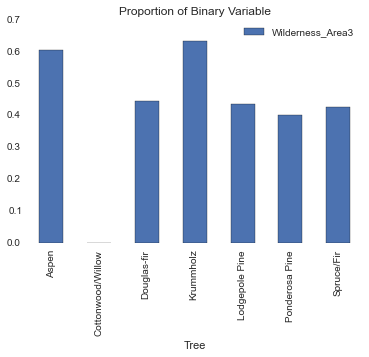

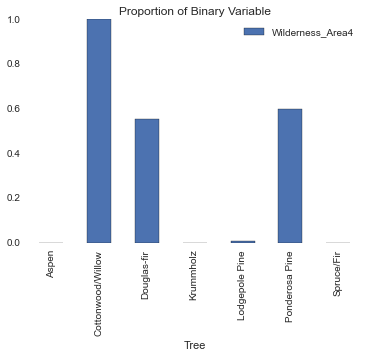

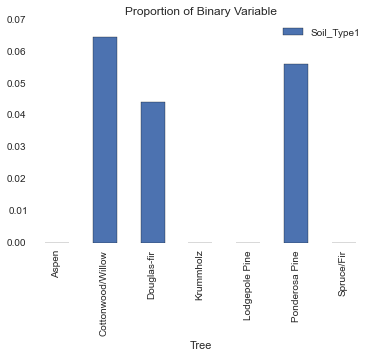

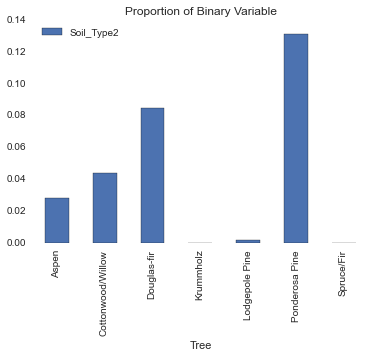

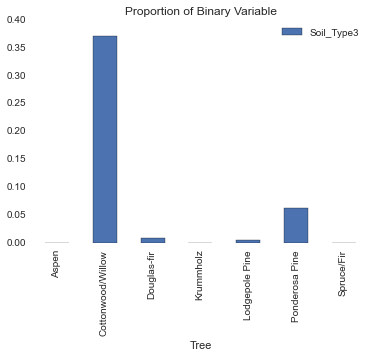

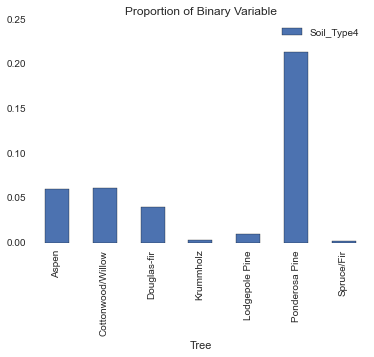

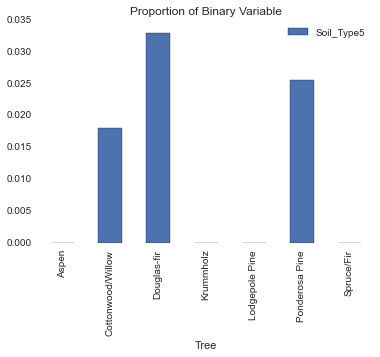

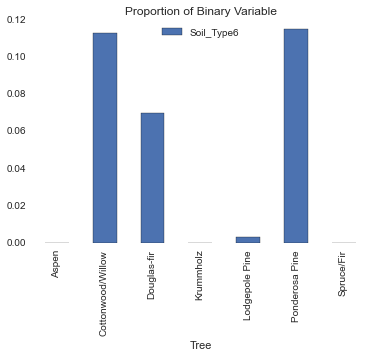

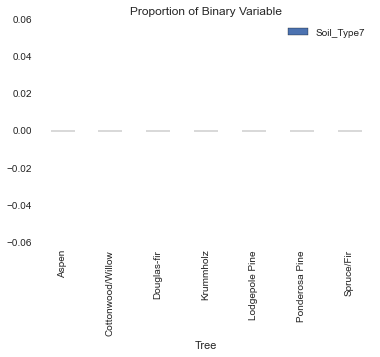

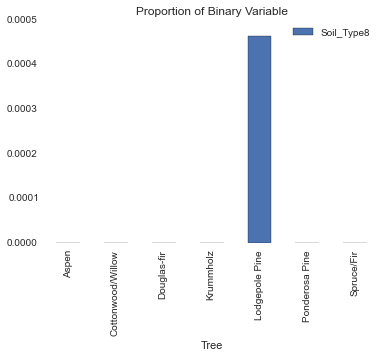

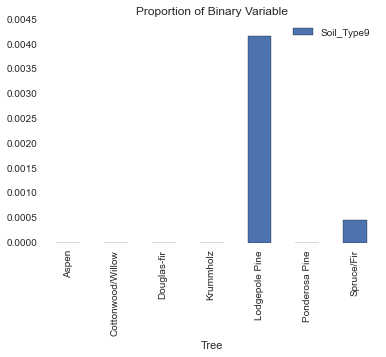

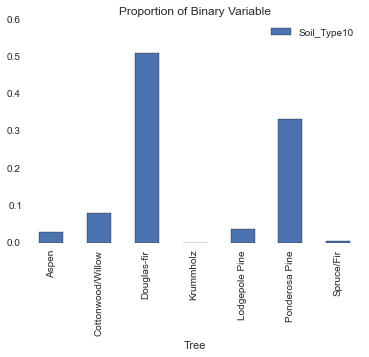

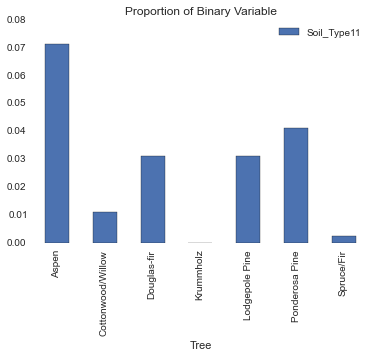

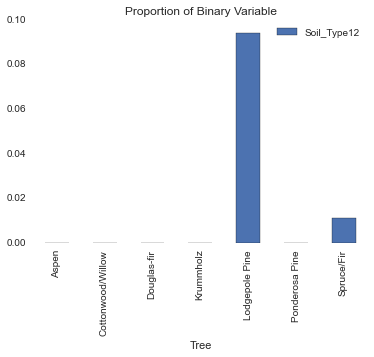

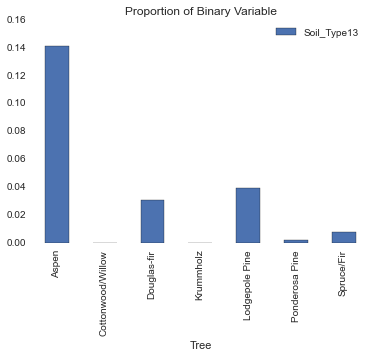

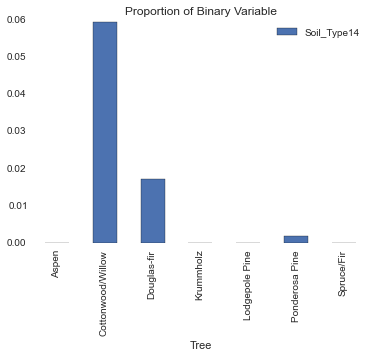

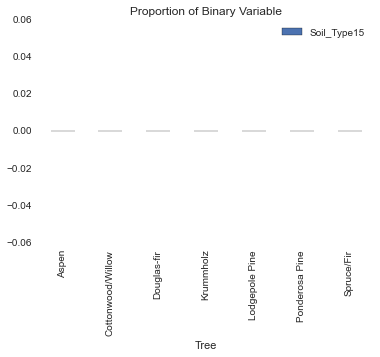

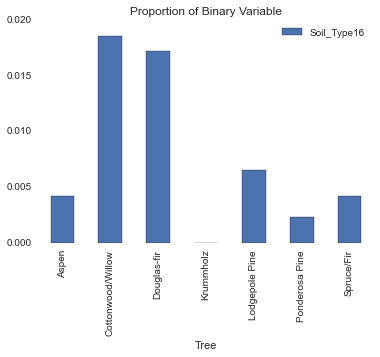

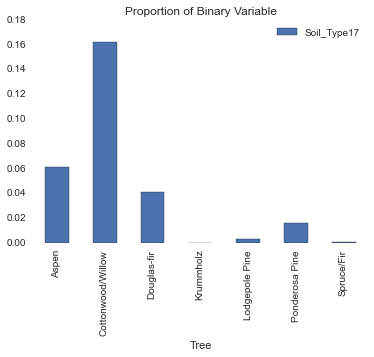

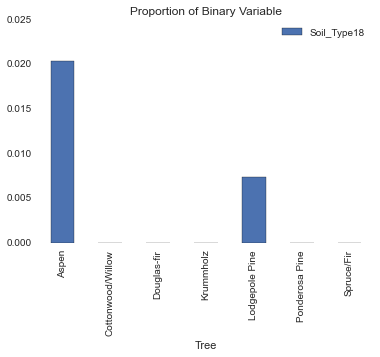

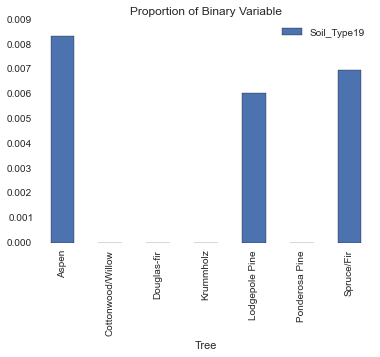

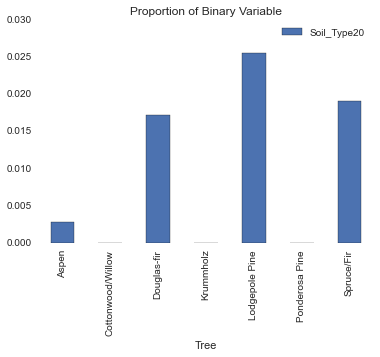

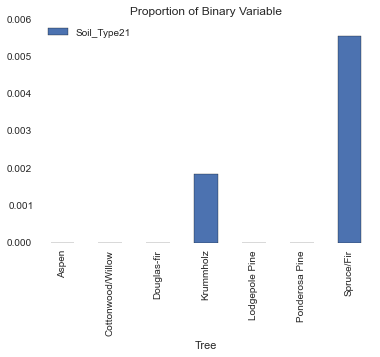

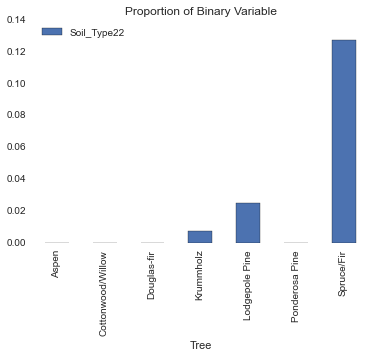

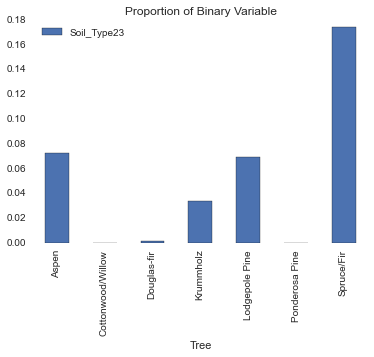

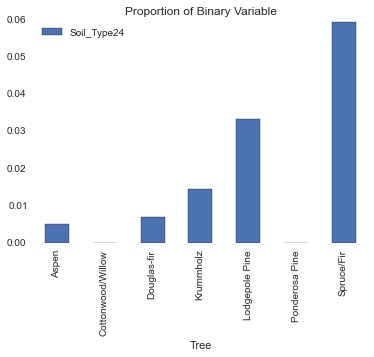

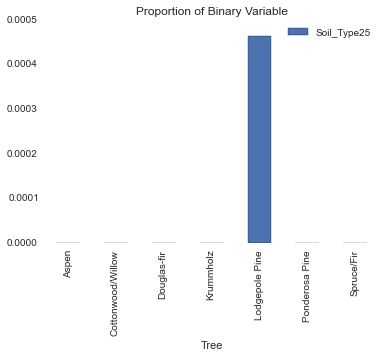

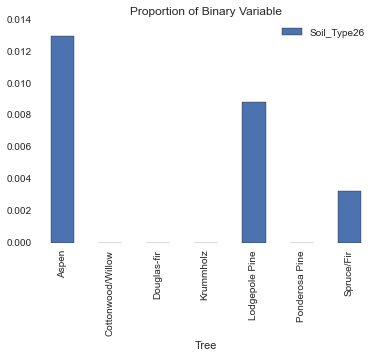

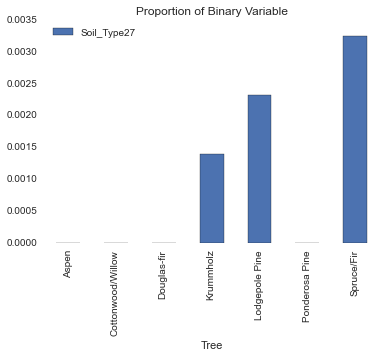

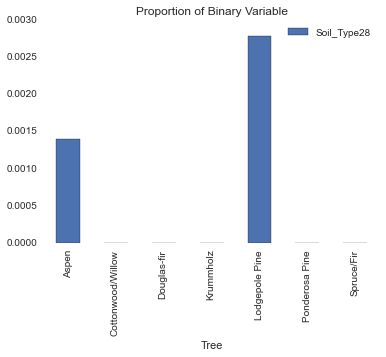

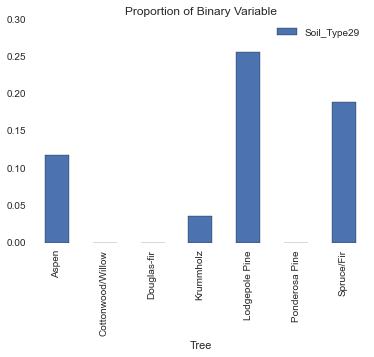

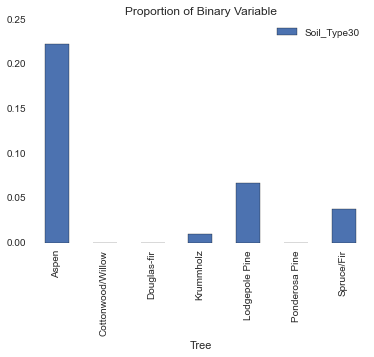

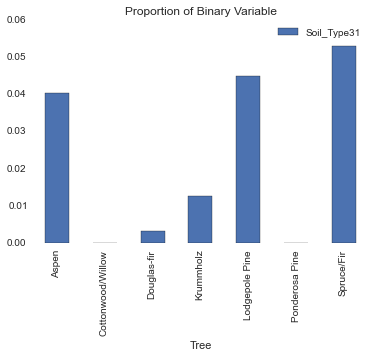

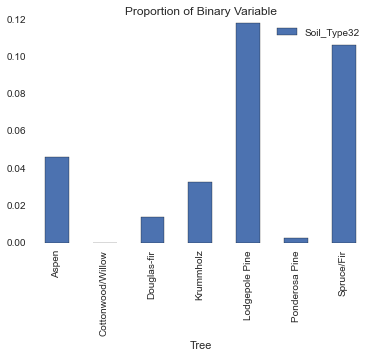

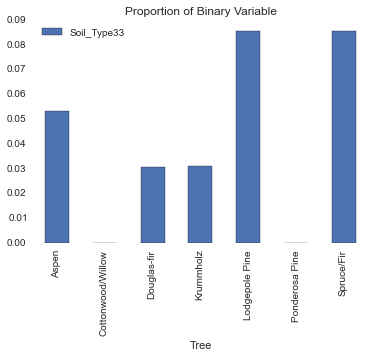

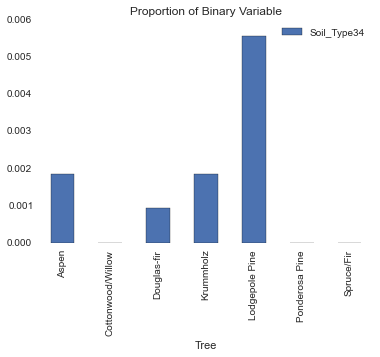

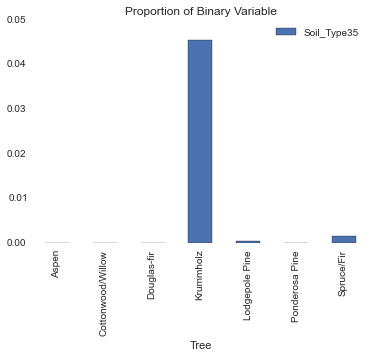

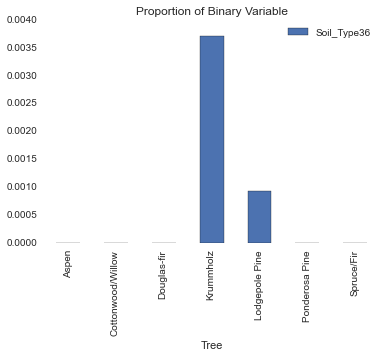

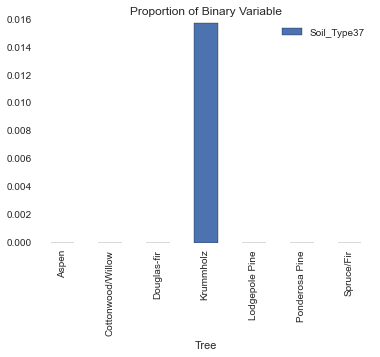

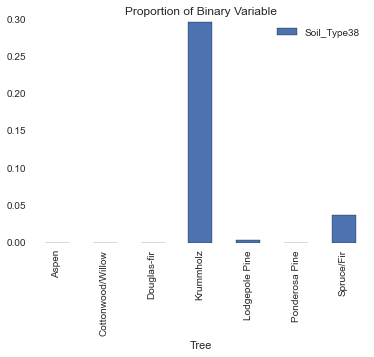

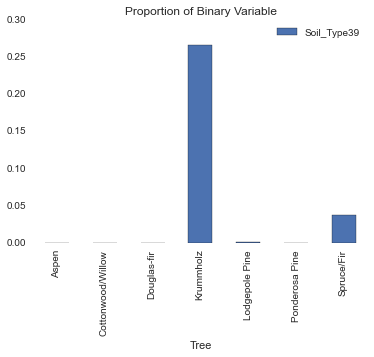

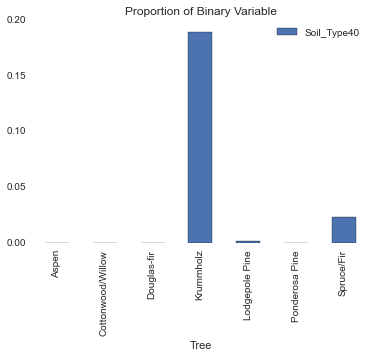

In [171]:
def binary_dist(var):
    gb = train_data.groupby(['Tree'])[var].mean()
    df = pd.DataFrame(gb)
    df.plot(kind='bar', title = "Proportion of Binary Variable")

for i in binary_columns:
    binary_dist(i)